In [19]:
# 데이터 분석 및 시각화에 필요한 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

[사전 실행 지시사항]

모든 문제를 풀기 전에 아래 코드를 실행해주세요.

In [20]:
#문제01
import lightgbm as lgb

[문제 1] LightGBM 라이브러리 임포트

LightGBM은 Microsoft에서 개발한 그래디언트 부스팅 머신러닝 라이브러리입니다.
lightgbm을 lgb로 별칭하여 임포트하세요.

In [21]:
#문제02
estate_df = pd.read_csv('data/2_real_estate_valuation.csv')
estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   region               1500 non-null   object 
 1   area_sqm             1500 non-null   float64
 2   num_rooms            1456 non-null   float64
 3   num_bathrooms        1467 non-null   float64
 4   building_age         1459 non-null   float64
 5   building_material    1453 non-null   object 
 6   parking_spaces       1455 non-null   float64
 7   subway_stations_1km  1451 non-null   float64
 8   amenities_500m       1500 non-null   float64
 9   school_score         1500 non-null   float64
 10  price_eok            1500 non-null   float64
dtypes: float64(9), object(2)
memory usage: 129.0+ KB


[문제 2] 데이터 로드 및 탐색

실시간 부동산 평가 데이터셋을 로드하고 기본 정보를 확인하세요.

### ● 작업 가이드
- pandas의 read_csv() 함수로 '2_real_estate_valuation.csv' 파일 로드
- 데이터프레임을 estate_df 변수에 저장
- info() 메서드로 데이터 구조 확인
- describe() 메서드로 통계 요약 확인

In [22]:
estate_df.describe()

,area_sqm,num_rooms,num_bathrooms,building_age,parking_spaces,subway_stations_1km,amenities_500m,school_score,price_eok
count,1500.000000,1456.000000,1467.000000,1459.000000,1455.000000,1451.000000,1500.000000,1500.000000,1500.000000
mean,123.692000,3.014423,2.006135,19.608636,1.751890,1.463129,6.911333,5.355333,27.123733
std,44.412913,1.387400,0.807090,11.449344,0.601141,1.130388,4.241320,2.914344,6.945192
min,50.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,6.200000
25%,83.000000,2.000000,1.000000,10.000000,1.000000,0.000000,3.000000,3.000000,22.100000
50%,123.000000,3.000000,2.000000,20.000000,2.000000,1.000000,7.000000,5.000000,27.150000
75%,161.250000,4.000000,3.000000,30.000000,2.000000,2.000000,10.250000,8.000000,31.900000
max,199.000000,5.000000,3.000000,39.000000,3.000000,3.000000,14.000000,10.000000,46.600000


In [23]:
#문제03 : 면적(area_sqm)과 가격(price_eok) 사이의 관계를 시각적으로 탐색하고, 학군점수(school_school)가 이 관계에 미치는 영향을 확인하고자 합니다. 

[문제 3] 면적과 가격의 관계 시각화

면적(area_sqm)과 가격(price_eok) 사이의 관계를 시각적으로 탐색하고, 
학군점수(school_score)가 이 관계에 미치는 영향을 확인하세요.

### ● 작업 가이드
- seaborn의 scatterplot 사용
- x축: area_sqm (면적)
- y축: price_eok (가격)
- hue: school_score (학군점수로 색상 구분)

<Axes: xlabel='area_sqm', ylabel='price_eok'>

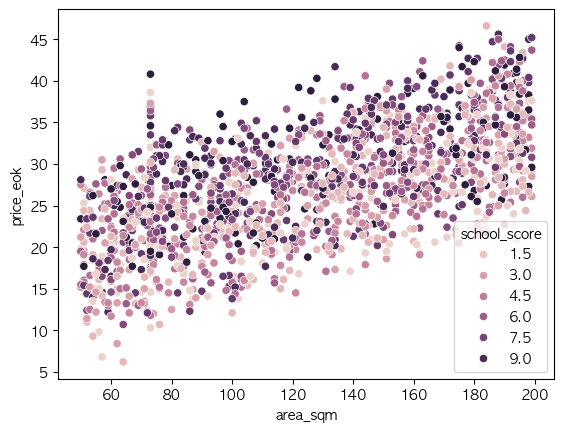

In [24]:
sns.scatterplot(data=estate_df, x='area_sqm', y='price_eok', hue='school_score') 

[문제 4] 건축자재별 가격분포 비교

building_material에 따라 가격분포가 어떻게 다른지 확인하세요.
seaborn의 violinplot을 사용하여 building_material에 따른 price_eok의 분포를 시각화하세요.

### ● 시각화 설정
- 한글 폰트 설정 (Mac: AppleGothic, Windows: Malgun Gothic)
- 음수 기호 표시 설정

### ● 작업 가이드
- seaborn의 violinplot 사용
- x축: building_material (건축자재)
- y축: price_eok (가격)

### ● 추가 분석
violinplot을 보고 가격분포의 편차가 가장 큰 건축자재를 찾아 답안04에 저장하세요.

In [26]:
import platform
from matplotlib import rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else:
    rc('font', family='Malgun Gothic')

plt.rcParams['axes.unicode_minus'] = False

<Axes: xlabel='building_material', ylabel='price_eok'>

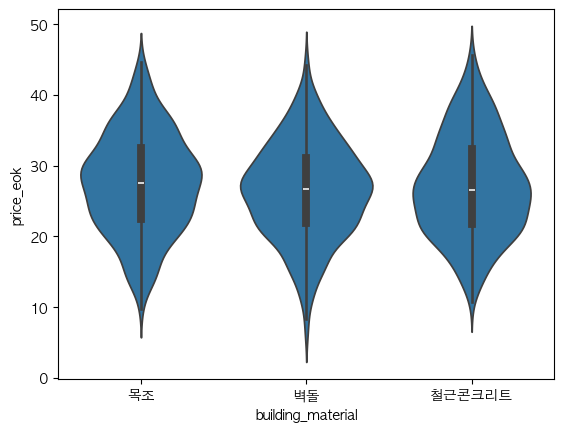

In [27]:
sns.violinplot(data=estate_df, x='building_material', y='price_eok')

In [30]:
estate_df

,region,area_sqm,num_rooms,num_bathrooms,building_age,building_material,parking_spaces,subway_stations_1km,amenities_500m,school_score,price_eok
0,서초,105.0,4.0,3.0,12.0,목조,1.0,1.0,11.0,7.0,29.7
1,서초,105.0,2.0,3.0,13.0,목조,2.0,3.0,2.0,3.0,29.6
2,강남,128.0,1.0,2.0,18.0,벽돌,2.0,NaN,11.0,9.0,30.3
3,강남,137.0,2.0,1.0,13.0,벽돌,2.0,0.0,5.0,3.0,29.1
4,서초,115.0,1.0,1.0,38.0,철근콘크리트,1.0,3.0,10.0,4.0,26.4
...,...,...,...,...,...,...,...,...,...,...,...
1495,강북,100.0,2.0,1.0,31.0,벽돌,NaN,0.0,3.0,2.0,12.1
1496,강남,122.0,3.0,1.0,19.0,NaN,2.0,3.0,5.0,4.0,28.4
1497,강북,99.0,2.0,3.0,39.0,목조,1.0,3.0,3.0,7.0,18.9
1498,강남,59.0,1.0,1.0,32.0,철근콘크리트,1.0,2.0,14.0,6.0,23.4


In [33]:
estate_df.groupby('building_material')['price_eok'].agg(lambda x: x.quantile(0.75) - x.quantile(0.25))


building_material
목조        10.05
벽돌         9.20
철근콘크리트    10.60
Name: price_eok, dtype: float64

In [ ]:
답안04 = '철근콘크리트'

[문제 5] 지역별 편의시설 현황

지역(region)별로 지하철역, 편의시설 접근성을 비교해 보세요.
groupby를 사용하여 지역별 subway_stations_1km과 amenities_500m의 평균을 계산하세요.

### ● 작업 가이드
- region으로 groupby 수행
- subway_stations_1km의 평균값 계산
- amenities_500m의 평균값 계산
- 결과를 보기좋게 정렬하여 표시

### ● 결과 해석
계산된 평균값을 바탕으로:
- 지하철역이 가장 많은 지역
- 편의시설이 가장 많은 지역
- 위 두 정보를 답안05에 저장하세요.

In [35]:
estate_df.head()

,region,area_sqm,num_rooms,num_bathrooms,building_age,building_material,parking_spaces,subway_stations_1km,amenities_500m,school_score,price_eok
0,서초,105.0,4.0,3.0,12.0,목조,1.0,1.0,11.0,7.0,29.7
1,서초,105.0,2.0,3.0,13.0,목조,2.0,3.0,2.0,3.0,29.6
2,강남,128.0,1.0,2.0,18.0,벽돌,2.0,NaN,11.0,9.0,30.3
3,강남,137.0,2.0,1.0,13.0,벽돌,2.0,0.0,5.0,3.0,29.1
4,서초,115.0,1.0,1.0,38.0,철근콘크리트,1.0,3.0,10.0,4.0,26.4


In [43]:
region_infra_mean = estate_df.groupby('region')[['subway_stations_1km','amenities_500m']].mean()
region_infra_mean

,subway_stations_1km,amenities_500m
region,,
강남,1.471132,7.055310
강북,1.387821,6.931464
기타,1.551471,6.579710
마포,1.475352,6.715753
서초,1.479021,7.016835


[문제 6] 결측값 처리

데이터셋의 결측값을 적절하게 처리하세요.

### ● 작업 단계
1. 전체 결측값 개수 및 비율 확인
   - 각 컬럼별 결측값 계산

2. 수치형 컬럼 결측값 처리
   - 중앙값(median)으로 imputation
   - 예: subway_stations_1km, amenities_500m, etc.

3. 범주형 컬럼 결측값 처리
   - 'unknown'으로 imputation
   - 예: building_material, region, etc.

4. 처리 후 검증
   - 결측값 완전 제거 확인


In [45]:
estate_pre = estate_df.copy()
estate_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   region               1500 non-null   object 
 1   area_sqm             1500 non-null   float64
 2   num_rooms            1456 non-null   float64
 3   num_bathrooms        1467 non-null   float64
 4   building_age         1459 non-null   float64
 5   building_material    1453 non-null   object 
 6   parking_spaces       1455 non-null   float64
 7   subway_stations_1km  1451 non-null   float64
 8   amenities_500m       1500 non-null   float64
 9   school_score         1500 non-null   float64
 10  price_eok            1500 non-null   float64
dtypes: float64(9), object(2)
memory usage: 129.0+ KB


In [48]:
# 범주형 결측치 처리
estate_pre['building_material'].fillna('unknown', inplace=True)
estate_pre

,region,area_sqm,num_rooms,num_bathrooms,building_age,building_material,parking_spaces,subway_stations_1km,amenities_500m,school_score,price_eok
0,서초,105.0,4.0,3.0,12.0,목조,1.0,1.0,11.0,7.0,29.7
1,서초,105.0,2.0,3.0,13.0,목조,2.0,3.0,2.0,3.0,29.6
2,강남,128.0,1.0,2.0,18.0,벽돌,2.0,NaN,11.0,9.0,30.3
3,강남,137.0,2.0,1.0,13.0,벽돌,2.0,0.0,5.0,3.0,29.1
4,서초,115.0,1.0,1.0,38.0,철근콘크리트,1.0,3.0,10.0,4.0,26.4
...,...,...,...,...,...,...,...,...,...,...,...
1495,강북,100.0,2.0,1.0,31.0,벽돌,NaN,0.0,3.0,2.0,12.1
1496,강남,122.0,3.0,1.0,19.0,unknown,2.0,3.0,5.0,4.0,28.4
1497,강북,99.0,2.0,3.0,39.0,목조,1.0,3.0,3.0,7.0,18.9
1498,강남,59.0,1.0,1.0,32.0,철근콘크리트,1.0,2.0,14.0,6.0,23.4


In [51]:
# 수치형 결측치 처리
numeric_cols = estate_pre.select_dtypes(include=['float64','int64'])
print(numeric_cols.isnull().sum())

area_sqm                0
num_rooms              44
num_bathrooms          33
building_age           41
parking_spaces         45
subway_stations_1km    49
amenities_500m          0
school_score            0
price_eok               0
dtype: int64


In [53]:
for col in numeric_cols:
    if estate_pre[col].isnull().sum( )> 0:
        median_value = estate_pre[col].median()
        estate_pre[col] = estate_pre[col].fillna(median_value)

In [55]:
estate_pre.isnull().sum()

region                 0
area_sqm               0
num_rooms              0
num_bathrooms          0
building_age           0
building_material      0
parking_spaces         0
subway_stations_1km    0
amenities_500m         0
school_score           0
price_eok              0
dtype: int64

In [56]:
# 문제07 : 머신러닝모델이 이해할 수 있도록 범주형 데이터를 수치형으로 변환하려고 합니다. sklearn.preprocessing 의 LabelEncoder를 사용하여 region 과 building_matirial 컬럼을 각각 라벨인코딩 하세요. 
# LableEncoder 객체를 생성하여 각 컬럼에 fit_transform을 적용하고, 변환된 결과를 다시 원래 데이터프레임의 해당 컬럼에 덮어쓰세요.

In [57]:
estate_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   region               1500 non-null   object 
 1   area_sqm             1500 non-null   float64
 2   num_rooms            1500 non-null   float64
 3   num_bathrooms        1500 non-null   float64
 4   building_age         1500 non-null   float64
 5   building_material    1500 non-null   object 
 6   parking_spaces       1500 non-null   float64
 7   subway_stations_1km  1500 non-null   float64
 8   amenities_500m       1500 non-null   float64
 9   school_score         1500 non-null   float64
 10  price_eok            1500 non-null   float64
dtypes: float64(9), object(2)
memory usage: 129.0+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1. 수치형으로 변환할 범주형 데이터 찾기 + 리스트로 변환
categorical_cols = estate_pre.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['region', 'building_material']

In [62]:
# 2. labelencoder객체생성, 각 컬럼 fit_transform적용, 결과 덮어쓰기
le = LabelEncoder()
for col in categorical_cols:
    estate_pre[col] = le.fit_transform(estate_pre[col])
estate_pre.head()

,region,area_sqm,num_rooms,num_bathrooms,building_age,building_material,parking_spaces,subway_stations_1km,amenities_500m,school_score,price_eok
0,4,105.0,4.0,3.0,12.0,1,1.0,1.0,11.0,7.0,29.7
1,4,105.0,2.0,3.0,13.0,1,2.0,3.0,2.0,3.0,29.6
2,0,128.0,1.0,2.0,18.0,2,2.0,1.0,11.0,9.0,30.3
3,0,137.0,2.0,1.0,13.0,2,2.0,0.0,5.0,3.0,29.1
4,4,115.0,1.0,1.0,38.0,3,1.0,3.0,10.0,4.0,26.4


In [63]:
# 문제08 : 훈련과 검증에 사용할 데이터셋을 분리하려고 합니다. price_eok컬럼을 label y 로, 나머지 컬럼들을 feature X로 할당한 후 훈련 데이터셋과 검증 데이터셋으로 분리하는 코드를 작성하시오.
# 대상데이터셋 : estate_pre
# sklearn.model_selection 의 train_test_split 함수 사용
# 훈련:검증 데이터 비율 8:2
# random_state=42

In [72]:
from sklearn.model_selection import train_test_split

X = estate_pre.drop(['price_eok'], axis=1)
y = estate_pre['price_eok']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_valid.shape)
print(y_train.shape, y_valid.shape)

(1200, 10) (300, 10)
(1200,) (300,)


In [73]:
# 문제09 : 수치형 데이터들의 단위를 맞춰주기 위해 데이터 스케일링을 진행합니다. 평균을 0, 표준편차를 1로 변환해주는 StandardScaler를 사용하여 훈련 데이터와 검증 데이터의 Feature(X_train, X_valid)를 스케일링하는 코드를 작성하세요. 
# sklearn.preprocessing 의 StandardScaler 함수 사용
# 훈련 데이터에는 fit_transform()을, 검증 데이터에는 transform()을 적용하세요.
# 스케일링된 결과는 각각 X_train_scaled, X_valid_scaled 변수에 저장하세요.

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
print(X_train_scaled.shape, X_train_scaled[0])
print(X_valid_scaled.shape, X_valid_scaled[0])



(1200, 10) [ 0.79204074 -0.1256071  -0.00365476  0.00627468  0.91613973  1.24938563
  0.40699641 -0.40150377  0.4968055   1.24354878]
(300, 10) [-1.16495765 -0.95366282 -0.7346064  -1.24866163  1.00459155  1.24938563
  0.40699641 -0.40150377 -0.44314973  0.90018511]


In [ ]:
# 문제10 : 선형회귀 모델 중 하나인 Ridge 회귀 모델을 사용하여 부동산 가격예측 모델을 학습시키려고 합니다. 아래 가이드에 따라 모델을 생성하고 학습시키는 코드를 작성하세요. 
# sklearn.linear_model의 Ridge 함수 사용
# 하이퍼파라미터 | alpha=1.0, random_state=42
# 모델 객체는 model_ridge 변수에 저장하고, 스케일링된 훈련 데이터로 학습
# predict() 를 사용하여 검증 데이터에 대한 예측값을 ridge_pred에 저장

In [81]:
from sklearn.linear_model import Ridge

# 릿지모델 생성
model_ridge = Ridge(alpha=1.0, random_state=42)

# 모델학습
model_ridge.fit(X_train_scaled, y_train)

# 예측
ridge_pred = model_ridge.predict(X_valid_scaled)



In [82]:
# 문제11: 이번에는 LGBMRegressor 모델을 사용하여 학습을 진행하고, 이 모델의 예측 성능을 확인하려고 합니다. 아래 가이드에 따라 모델을 학습시키고, 검증 데이터셋(X_valid_scaled)에 대한 예측결과를 lgbm_pred 변수에 저장하세요.
# lightgbm의 LGBMRegressor 함수 사용 (1에서 lgb로 임포트)
# 하이퍼파라미터 | n_estimators=200, lr=0.05, random_state=42
# 모델 객체는 model_lgbm 변수에 저장하고 학습시키세요.

In [90]:
import lightgbm as lgb

# 모델 설정
model_lgbm = lgb.LGBMRegressor(n_estimators=200, learning_rate=0.05, random_state=42)

# 모델 학습
model_lgbm.fit(X_train_scaled, y_train)

# 예측
lgbm_pred = model_lgbm.predict(X_valid_scaled)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 247
[LightGBM] [Info] Number of data points in the train set: 1200, number of used features: 10
[LightGBM] [Info] Start training from score 27.126667


In [91]:
# 문제12 : 앞서 평가한 두 모델의 MAE와 R2_score를 계산
# sklearn.metrics 에서 mean_absolute_error, r2_score 함수 import
# 두 모델에 대해 각각 y_valid와 예측값을 사용하여 두가지 평가지표를 모두 계산하고 출력

In [92]:
from sklearn.metrics import mean_absolute_error, r2_score

ridge_pred = model_ridge.predict(X_valid_scaled)
ridge_mae = mean_absolute_error(ridge_pred, y_valid)
ridge_r2 = r2_score(ridge_pred, y_valid)

lgbm_pred = model_lgbm.predict(X_valid_scaled)
lgbm_mae = mean_absolute_error(lgbm_pred, y_valid)
lgbm_r2 = r2_score(lgbm_pred, y_valid)

print(f"RidgeRegressor | mae : {ridge_mae:.4f} | r2 : {ridge_r2:.4f}")
print(f"LGBMRegressor  | mae : {lgbm_mae:.4f} | r2 : {lgbm_r2:.4f}")

RidgeRegressor | mae : 3.5716 | r2 : 0.4123
LGBMRegressor  | mae : 1.1816 | r2 : 0.9159


In [93]:
# 문제13 : 이번에는 딥러닝을 사용하여 가격예측 모델을 만들려고 합니다. 아래의 가이드에 따라 tensorflow.keras 를 사용하여 회귀모델을 구축하고 학습시키세요. 이번 모델에는 과적합 방지를 위해 Dropout 레이어 추가
# Sequential 모델 사용
# 모델 구조  
# 입력층 Dense layer, 64개 노드, 활성함수 : relu
# Dropout : 0.2
# 은닉층1 Dense layer, 32개 노드, 활성함수 : relu
# 출력층 Dense layer, 1roshem
# 컴파일 : optimizer=adam, loss=mae
# 학습설정 : epoch=100, batch_size=16, validation_split=0.2

In [96]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [99]:
model_dl = Sequential([
    Dense(64, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
model_dl.compile(optimizer='adam', loss='mean_squared_error')

history = model_dl.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_valid_scaled, y_valid),
    verbose=0
)

model_dl.evaluate(X_valid_scaled, y_valid)

10/10 [==============================] - 0s 993us/step - loss: 5.3143


5.314319610595703

In [100]:
# 문제 13-2 파이토치로 해결하기

In [101]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

In [102]:
# 데이터를 Numpy에서 Pytorch 텐서로 변환
X_train_torch = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.values, dtype=torch.float32).view(-1,1)
X_valid_torch = torch.tensor(X_valid_scaled, dtype=torch.float32)
y_valid_torch = torch.tensor(y_valid.values, dtype=torch.float32).view(-1,1)

In [103]:
# TensorDataset, DataLoader 생성
train_dataset = TensorDataset(X_train_torch, y_train_torch)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

valid_dataset = TensorDataset(X_valid_torch, y_valid_torch)
valid_dataloader = DataLoader(valid_dataset, batch_size=64)

In [104]:
# GPU/CPU 선택
device = torch.device("cudo" if torch.cuda.is_available() else "cpu")

In [107]:
# 신경망 모델 클래스 정의
class PricePredictor(nn.Module):
    def __init__(self, input_size, hidden_size=32, dropout_rate=0.2):
        super(PricePredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(64, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 모델 생성
input_size = X_train_torch.shape[1]
model = PricePredictor(input_size=input_size, hidden_size=32, dropout_rate=0.2)
model.to(device)

# 손실 함수 및 최적화기 정의
criterion = nn.L1Loss()  # MAE
optimizer = optim.Adam(model.parameters(), lr=0.001)

print(f"✓ 모델 생성 완료!")
print(f"입력 크기: {input_size}")
print(f"장치: {device}")
print(model)

✓ 모델 생성 완료!
입력 크기: 10
장치: cpu
PricePredictor(
  (fc1): Linear(in_features=10, out_features=64, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
)


In [109]:
epochs = 50

for epoch in range(epochs):
    epoch_loss = 0.0  
    
    for batch_idx, samples in enumerate(train_dataloader):
        xb, yb = samples
        xb, yb = xb.to(device), yb.to(device)

        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()  # 역전파
        optimizer.step()
        epoch_loss += loss.item() * xb.size(0)

    epoch_loss /= len(train_dataloader.dataset)

    print(f"Epoch : {epoch+1}/{epochs}, Train Loss : {epoch_loss :.4f}")

print("\n✓ 모델 학습 완료!")

Epoch : 1/50, Train Loss : 26.1651
Epoch : 2/50, Train Loss : 22.5067
Epoch : 3/50, Train Loss : 13.3804
Epoch : 4/50, Train Loss : 5.5571
Epoch : 5/50, Train Loss : 4.4630
Epoch : 6/50, Train Loss : 4.3323
Epoch : 7/50, Train Loss : 3.8633
Epoch : 8/50, Train Loss : 3.8871
Epoch : 5/50, Train Loss : 4.4630
Epoch : 6/50, Train Loss : 4.3323
Epoch : 7/50, Train Loss : 3.8633
Epoch : 8/50, Train Loss : 3.8871
Epoch : 9/50, Train Loss : 3.7847
Epoch : 10/50, Train Loss : 3.6967
Epoch : 11/50, Train Loss : 3.5904
Epoch : 12/50, Train Loss : 3.3767
Epoch : 13/50, Train Loss : 3.3595
Epoch : 9/50, Train Loss : 3.7847
Epoch : 10/50, Train Loss : 3.6967
Epoch : 11/50, Train Loss : 3.5904
Epoch : 12/50, Train Loss : 3.3767
Epoch : 13/50, Train Loss : 3.3595
Epoch : 14/50, Train Loss : 3.2309
Epoch : 15/50, Train Loss : 3.1823
Epoch : 16/50, Train Loss : 3.1079
Epoch : 17/50, Train Loss : 2.9147
Epoch : 18/50, Train Loss : 3.0378
Epoch : 19/50, Train Loss : 2.9548
Epoch : 14/50, Train Loss : 3.2

In [ ]:
# 검증

# ---- 평가 모드 설정 ----
model.eval()  # 모델을 평가 모드로 (Dropout, BatchNorm 비활성화)
valid_loss = 0  # 검증 손실 누적값 (0으로 초기화)

# ---- 그래디언트 계산 안 함 (메모리 절약) ----
# 검증 중에는 가중치를 업데이트하지 않으므로 그래디언트 불필요
with torch.no_grad():
    # 검증 데이터로 배치 단위 평가
    for batch_idx, samples in enumerate(valid_dataloader):
        xb, yb = samples
        # 데이터를 GPU/CPU로 옮김
        xb, yb = xb.to(device), yb.to(device)

        # ---- 순전파만 수행 ----
        # (역전파는 하지 않음)
        pred = model(xb)
        
        # ---- 검증 손실 계산 ----
        valid_loss += criterion(pred, yb).item() * xb.size(0)

# ---- 검증 평균 손실 계산 ----
valid_loss /= len(valid_dataloader.dataset)

# ---- 검증 결과 출력 ----
print(f"\n{'='*60}")
print(f"검증 결과 (Validation Result)")
print(f"{'='*60}")
print(f"Validation MAE (평균 절대 오차): {valid_loss:.4f}")
print(f"✓ MAE가 작을수록 모델 성능이 좋습니다!")
print(f"{'='*60}")


검증 결과 (Validation Result)
Validation MAE (평균 절대 오차): 1.4322
✓ MAE가 작을수록 모델 성능이 좋습니다!
